<a href="https://colab.research.google.com/github/tara618/symmetrical-octo-palm-tree/blob/main/ML_Lab_6_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [4]:
df = pd.read_csv('./waterPotability_updated.csv')
df.sample(20)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
2582,5.331799,149.955047,19693.906772,7.146140,336.011908,285.998049,14.298579,46.113763,4.734874,0
305,6.428866,225.613094,15596.473334,6.153472,333.775777,466.044399,18.015385,87.163631,4.184783,1
1971,6.333640,185.436340,18506.288609,6.572682,356.971033,366.813108,16.439629,76.764385,3.982002,1
2962,8.527142,217.394778,3413.081633,5.670027,337.631073,615.611167,14.926751,82.590152,2.649424,0
208,10.026159,224.266358,14962.177833,7.428313,336.972950,517.512842,18.858519,65.363452,4.182278,0
1296,4.249890,168.572146,16073.670620,5.360896,261.267707,449.051516,11.349210,86.946897,4.116348,0
784,7.442536,180.859091,18223.027080,8.577250,405.320016,564.793485,14.768337,57.757554,2.191138,1
853,5.039374,142.860598,40829.353167,7.271543,333.775777,386.803057,16.823773,52.297113,4.957420,0
474,7.080795,181.296125,23433.901774,7.729588,333.775777,329.740862,12.275713,38.756798,5.128347,0
2799,8.264091,216.551887,23556.934353,5.830685,333.500538,450.857491,8.667720,39.804179,3.410511,1


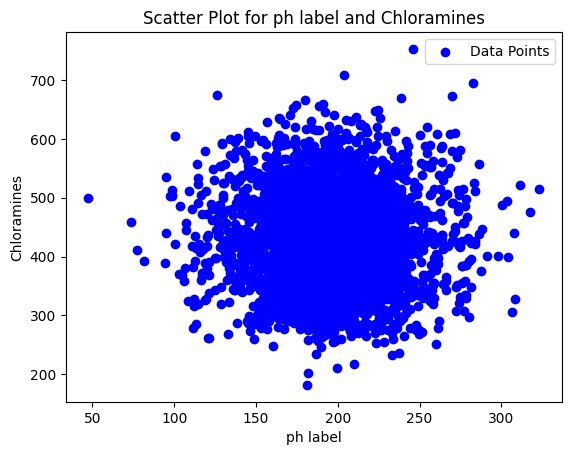

In [6]:
x = df['Hardness']
y = df['Conductivity']

plt.scatter(x, y, label='Data Points', color='blue', marker='o')

plt.xlabel('ph label')
plt.ylabel('Chloramines')
plt.title('Scatter Plot for ph label and Chloramines')

plt.legend()
plt.show()

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = df['Hardness'].values.reshape(-1, 1)
y = df['Potability'].values.reshape(-1, 1)

# Spliting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Creating a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Calculating the MSE
mse = mean_squared_error(y_test, y_pred)

print("Slope: ", model.coef_[0][0])
print("Intercept: ", model.intercept_[0])
print("R-squared: ", model.score(X_test, y_test))
print("Coefficients: ", model.coef_)
print("Mean Square Error: ", mse)

Slope:  -0.00022677445506015154
Intercept:  0.43932333555526093
R-squared:  -0.002208789105997866
Coefficients:  [[-0.00022677]]
Mean Square Error:  0.23411949070318952


In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# Spliting the dataset
X_train, X_test, y_train, y_test = train_test_split(df.drop("Potability", axis=1), df["Potability"], test_size=0.2, random_state=42)

# Training the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Making predictions on test set
y_pred = model.predict(X_test)

# Checking accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Test set accuracy:", accuracy)

Test set accuracy: 0.6280487804878049


In [11]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Selecting the features
X = df[['Hardness', 'Conductivity']]
y = df['ph']

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Regression Tree
tree = DecisionTreeRegressor(max_depth=3)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)
mse_tree = mean_squared_error(y_test, y_pred_tree)

# k-NN Regressor
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
mse_knn = mean_squared_error(y_test, y_pred_knn)

# Printing the MSE for both models
print("Mean Square Error (Regression Tree):", mse_tree)
print("Mean Square Error (k-NN Regressor):", mse_knn)

# Predicting the values using the Regression Tree and k-NN Regressor
new_data = np.array([[7.5, 350], [6.8, 400]])
print("Predicted values (Regression Tree):", tree.predict(new_data))
print("Predicted values (k-NN Regressor):", knn.predict(new_data))

Mean Square Error (Regression Tree): 2.149470457880756
Mean Square Error (k-NN Regressor): 2.471342294327347
Predicted values (Regression Tree): [10.93967624 10.93967624]
Predicted values (k-NN Regressor): [8.324823   8.96010067]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
